# Capstone - Covertype 


Forest Cover Type Dataset 
Tree types found in the Roosevelt National Forest in Colorado

https://www.kaggle.com/uciml/forest-cover-type-dataset



# Project Goals: 

### Goals
    1. Predicting cover type (most common with this dataset). 
    2. Using machine learning alogrithims to define Wilderness Areas based on avialable features
    3. Probabilites with Bayesian models to predict soil types of the cover types. 
    4. Predicting Fire points based on features
    5. Elevation, Slope, Aspect influence the soil types?
    6. Why is certain cover type more predominate over others in this region of Colorado? (Bring in cited literature)
    7. How can machine learning classification models help led to management decision of the roosevelt forest in colorado?

## Models
    
    1. Logistic Regression 
    2. Naive Bayes
    3. Xgboost
    4. Random Forest
 

## Previous Scientific literature on the dataset
https://pdfs.semanticscholar.org/42fd/f2999c46babe535974e14375fbb224445757.pdf
https://www.fs.fed.us/database/feis/plants/tree/poptre/all.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins
from scipy import stats

%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
# Loading the data again.


df = pd.read_csv('/Users/mille/Desktop/Supervised Learning/Copy of covtype.csv', low_memory=False)
print('Dataframe dimensions:', df.shape)


# providing more information per column on data types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
column type,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000


The dataset does not have any missing values. 

The Cover Type dataset contains 55 features. Of the 55 features in the dataset 10 features are continious and 44 features are binary (wilderness area and soil types). The remaining feature is catergorical Cover Type in 7 forest cover types. 

**How many datapoints?**
11 MB csv file 
581k X 55 

Target Feature is Cover_Type, below is a list of the categorical variables in Cover_Type:
1.Spruce/Fir
2.Lodgepole Pine
3.Ponderosa Pine
4.Cottonwood/Willow
5.Aspen
6.Douglas-fir
7.Krummholz

# Exploratory Data Analysis 

## I. Histograms

(array([211840., 283301.,      0.,  35754.,      0.,   2747.,   9493.,
             0.,  17367.,  20510.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

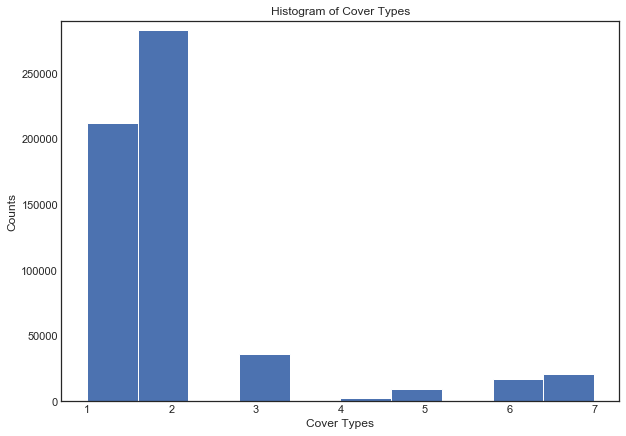

In [23]:
plt.figure(figsize=(10,7))
plt.xlabel('Cover Types')
plt.ylabel('Counts')
plt.title('Histogram of Cover Types')
plt.ylim(0, 290000)
plt.hist(df['Cover_Type'])

*The histogram of the Cover_Types shows an uneven balance in the data within the 7 cover type categories. Cover_Type 1 (Spruce/Fir) and 2 (Lodgepole pine) greatly outnumber the other Cover types in the dataset. *

#### Things to consider: 
1. Wilderness areas surveyed in the study primilarly consist of Cover type 1 (Spruce/Fir) and Cover type 2 (Lodgepole pine). 
2. The the areas surveyed are more homogeneous then heterogeneous. 
3. How much does elevation and other ecological features in the data set influence this distribution?

In [24]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [25]:
class_dist=df.groupby('Cover_Type').size()

for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

Cover_Type 1
36.46 %
Cover_Type 2
48.76 %
Cover_Type 3
6.15 %
Cover_Type 4
0.47 %
Cover_Type 5
1.63 %
Cover_Type 6
2.99 %
Cover_Type 7
3.53 %


*When cover type is calucalted by percentages, cover type 1 and 2 make up 85.22% of the forest cover types in this study. This is problematic in predicting cover type especially for predicting cover type is strongly weighted to two cover types. *

## Histograms of Cover type within Wilderness Area

*Below are four histograms with subplots of presence/absence of each Wilderness area. All of the histograms have the same scale to compare differences of cover type and wilderness area more effectively.*

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types). (https://archive.ics.uci.edu/ml/datasets/covertype)

Presence 1 = means that it is within the wilderness boundaries 
Absence 0 = means that it is not within the wilderness boundaries 

*This is evident because Cashe la Poudre and Neota Wilderness Area's majority of surveryed terrian seems to fall outside of the wilderness boundary. *

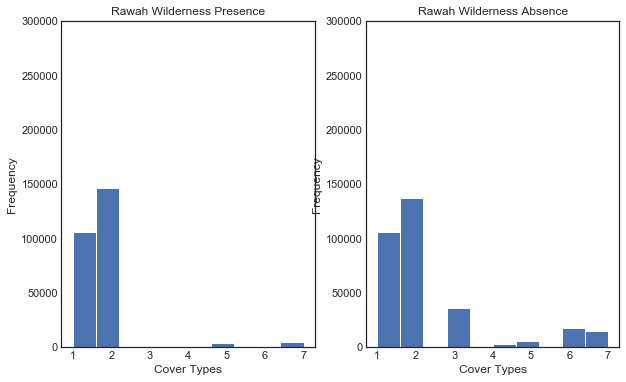

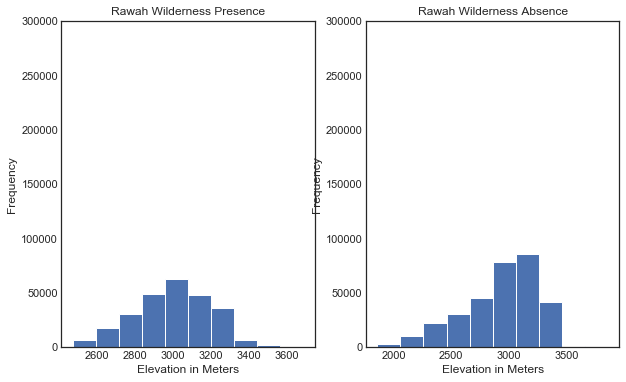

In [26]:
pre_wa1 = df[df["Wilderness_Area1"]==1]
ab_wa1= df[df["Wilderness_Area1"]==0]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.xlabel('Cover Types')
plt.ylim(0, 300000)
pre_wa1.Cover_Type.plot.hist(title="Rawah Wilderness Presence")

plt.subplot(122)
plt.xlabel('Cover Types')
plt.ylim(0, 300000)
ab_wa1.Cover_Type.plot.hist(title="Rawah Wilderness Absence")

pre_wa1 = df[df["Wilderness_Area1"]==1]
ab_wa1= df[df["Wilderness_Area1"]==0]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.xlabel('Elevation in Meters')
plt.ylim(0, 300000)
pre_wa1.Elevation.plot.hist(title="Rawah Wilderness Presence")

plt.subplot(122)
plt.xlabel('Elevation in Meters')
plt.ylim(0, 300000)
ab_wa1.Elevation.plot.hist(title="Rawah Wilderness Absence")

*One explaination why the Rawah Wilderness Absence has higher elevation is that the surveyed area is along the Laramier/Jackson county lines on the western portion of the Rawah wilderness boundary. This area contains very steep terrain with elevations above 3000 meters.*

Rawah Wilderness Area (73,213 acres) 45% of the surveyed area of the dataset. 
Contains 25 named lakes

Elevation 8,000 - 13,000 



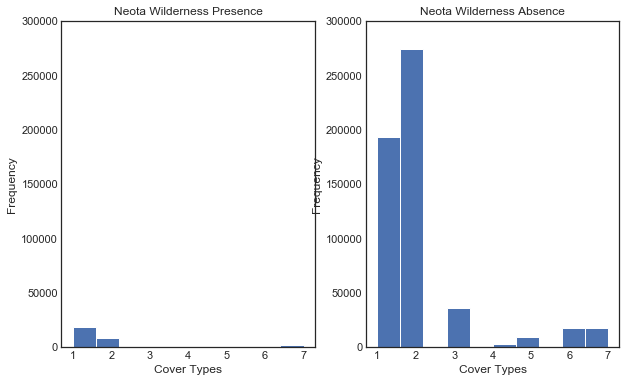

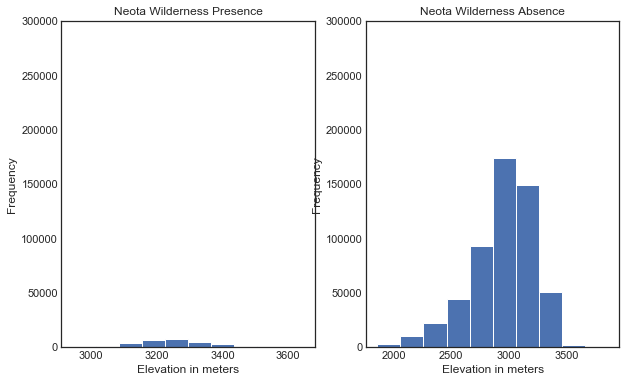

In [27]:
pre_wa2 = df[df["Wilderness_Area2"]==1]
ab_wa2= df[df["Wilderness_Area2"]==0]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.xlabel('Cover Types')
plt.ylim(0, 300000)
pre_wa2.Cover_Type.plot.hist(title="Neota Wilderness Presence")

plt.subplot(122)
plt.xlabel('Cover Types')
plt.ylim(0, 300000)
ab_wa2.Cover_Type.plot.hist(title="Neota Wilderness Absence")

pre_wa2 = df[df["Wilderness_Area2"]==1]
ab_wa2= df[df["Wilderness_Area2"]==0]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.xlabel('Elevation in meters')
plt.ylim(0, 300000)
pre_wa2.Elevation.plot.hist(title="Neota Wilderness Presence")

plt.subplot(122)
plt.xlabel('Elevation in meters')
plt.ylim(0, 300000)
ab_wa2.Elevation.plot.hist(title="Neota Wilderness Absence")

*Neota Wilderness area survey seems to be primilary above 10,000 ft or 3050 meters and it is quiet rocky. That the cover types are not present in considerable portions of the this wilderness area. The area that is study seems to be surveyed are the areas surrounding the wilderness area.*

Neota Wilderness Area (9647 acres)	0.061067398 - Elevation ranges from 10,000 ft (3,000 m) to 11,896 ft (3,626 m) 
Subalpine - Krummholz habitats (mostly) - lower elevations contain lodgepole 

Image for reference: 
![Alt text](https://www.colorado.com/sites/default/files/styles/1000x685/public/bywaysoverview_topoftherockies.jpg?itok=5L5FBi3V)



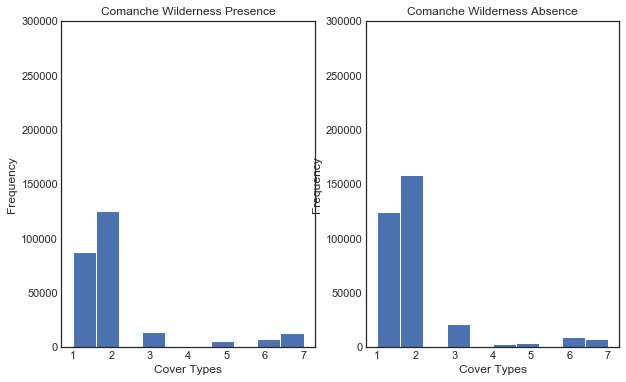

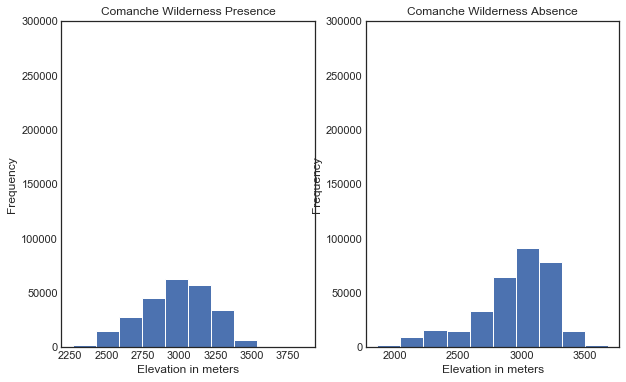

In [28]:
pre_wa3 = df[df["Wilderness_Area3"]==1]
ab_wa3= df[df["Wilderness_Area3"]==0]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.xlabel('Cover Types')
plt.ylim(0, 300000)
pre_wa3.Cover_Type.plot.hist(title="Comanche Wilderness Presence")

plt.subplot(122)
plt.xlabel('Cover Types')
plt.ylim(0, 300000)
ab_wa3.Cover_Type.plot.hist(title="Comanche Wilderness Absence")

pre_wa3 = df[df["Wilderness_Area3"]==1]
ab_wa3= df[df["Wilderness_Area3"]==0]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.xlabel('Elevation in meters')
plt.ylim(0, 300000)
pre_wa3.Elevation.plot.hist(title="Comanche Wilderness Presence")

plt.subplot(122)
plt.xlabel('Elevation in meters')
plt.ylim(0, 300000)
ab_wa3.Elevation.plot.hist(title="Comanche Wilderness Absence")

*The range of elevation in the Comanche Wilderness Area seems to capture all the cover types. The absence data shows elevations down to 2000 meters which is way it picks up all the cover types.*

Comanche Peak Wilderness Area (67,680 acres) 42.8% of the dataset - Elevation Ranges from 8,000 - to over 12,000 feet


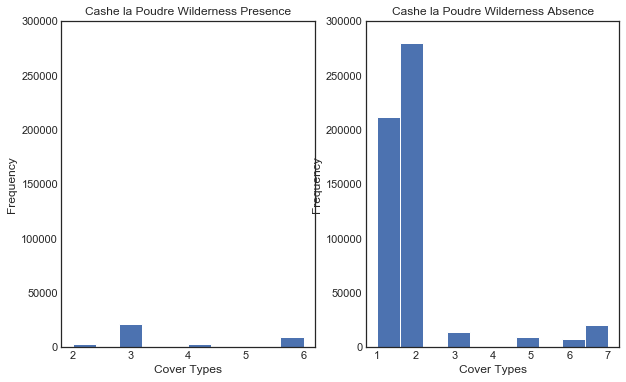

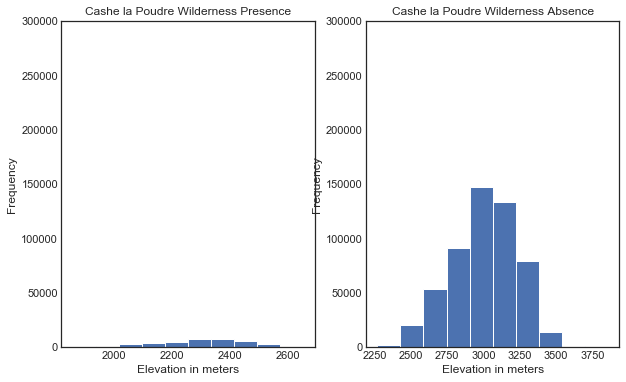

In [29]:
pre_wa4 = df[df["Wilderness_Area4"]==1]
ab_wa4= df[df["Wilderness_Area4"]==0]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.xlabel('Cover Types')
plt.ylim(0, 300000)
pre_wa4.Cover_Type.plot.hist(title="Cashe la Poudre Wilderness Presence")

plt.subplot(122)
plt.xlabel('Cover Types')
plt.ylim(0, 300000)
ab_wa4.Cover_Type.plot.hist(title="Cashe la Poudre Wilderness Absence")


pre_wa4 = df[df["Wilderness_Area4"]==1]
ab_wa4= df[df["Wilderness_Area4"]==0]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.xlabel('Elevation in meters')
plt.ylim(0, 300000)
pre_wa4.Elevation.plot.hist(title="Cashe la Poudre Wilderness Presence")

plt.subplot(122)
plt.xlabel('Elevation in meters')
plt.ylim(0, 300000)
ab_wa4.Elevation.plot.hist(title="Cashe la Poudre Wilderness Absence")


*The access points to where the forest was survey is important in understanding the presence/absence data.*

Cache la Poudre Wilderness Area (9433 acres) 0.059712736 - 6,200 feet (1,900 m) to 8,600 feet (2,600 m) It follows the Cashe la Pourde River likely Douglas Fir and Cottonwoods 

In [30]:
#Just continious features 
cont_data=df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

#All binary features
binary_data=df.loc[:,'Wilderness_Area1':'Soil_Type40']

#Wilderness area binary 
Wilderness_data=df.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

#Soil type binary 
Soil_data=df.loc[:,'Soil_Type1':'Soil_Type40']

In [31]:
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

Wilderness_Area1 0    320216
1    260796
Name: Wilderness_Area1, dtype: int64
Wilderness_Area2 0    551128
1     29884
Name: Wilderness_Area2, dtype: int64
Wilderness_Area3 0    327648
1    253364
Name: Wilderness_Area3, dtype: int64
Wilderness_Area4 0    544044
1     36968
Name: Wilderness_Area4, dtype: int64
Soil_Type1 0    577981
1      3031
Name: Soil_Type1, dtype: int64
Soil_Type2 0    573487
1      7525
Name: Soil_Type2, dtype: int64
Soil_Type3 0    576189
1      4823
Name: Soil_Type3, dtype: int64
Soil_Type4 0    568616
1     12396
Name: Soil_Type4, dtype: int64
Soil_Type5 0    579415
1      1597
Name: Soil_Type5, dtype: int64
Soil_Type6 0    574437
1      6575
Name: Soil_Type6, dtype: int64
Soil_Type7 0    580907
1       105
Name: Soil_Type7, dtype: int64
Soil_Type8 0    580833
1       179
Name: Soil_Type8, dtype: int64
Soil_Type9 0    579865
1      1147
Name: Soil_Type9, dtype: int64
Soil_Type10 0    548378
1     32634
Name: Soil_Type10, dtype: int64
Soil_Type11 0    568602
1 

*Among all the binary values the Absence (0) is considerably out weighing the Presence. In some of the Soil Type features the absence is 99%.*


#### Histograms of the continious features 


1. Elevation in meters. Normal distribution 
2. Aspect in degrees azimuth. Binomial distribution, when there is avialable light. 
3. Slope in degrees. Skewed left normal distribution 
4. Horizontal_Distance_To_Hydrology distance to nearest surface water features. Skewed left 
5. Vertical_Distance_To_Hydrology distance to nearest surface water features. Normal distribution
6. Horizontal_Distance_To_Roadways distance to nearest roadway. Skewed left normal distribution 
7. Hillshade_9am shade index at 9am, summer solstice. Value out of 255. Skewed right (has to do with the angle of the sunlight)
8. Hillshade_Noon shade index at noon, summer solstice. Value out of 255. Skewed right (has to do with the angle of the sunlight)
9. Hillshade_3pm shade index at 3pm, summer solstice. Value out of 255. Normal distribution 
10. Horizontal_Distance_To_Fire_Points distance to nearest wildfire ignition points. Skewed left normal distribution

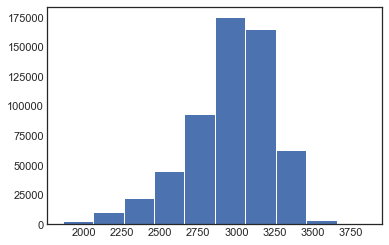

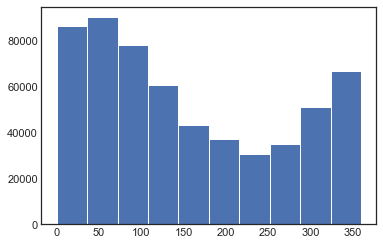

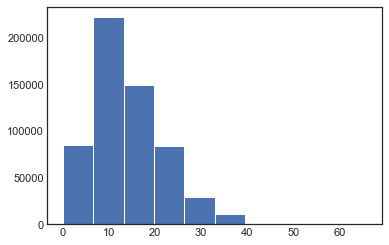

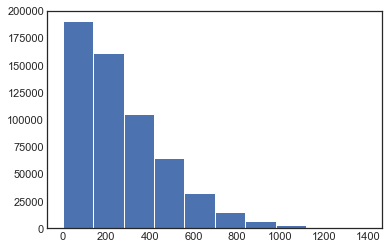

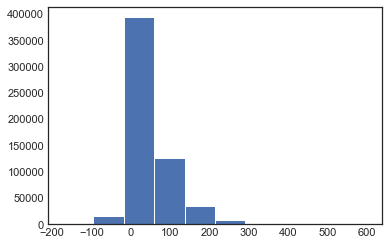

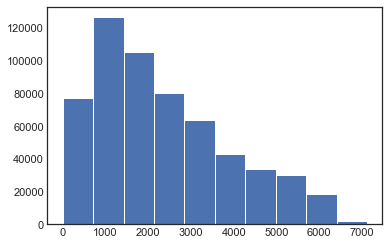

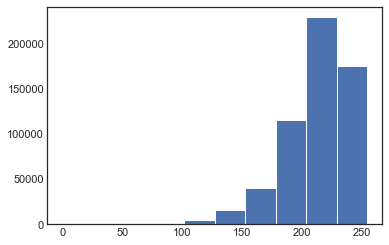

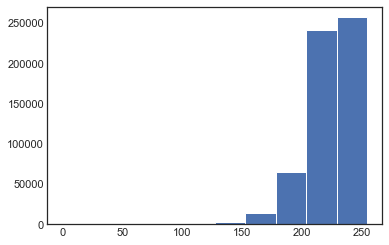

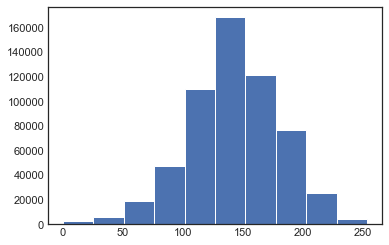

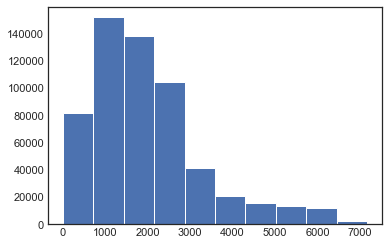

In [32]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    plt.hist(cont_data[col])

## EDA - Barplots - Cover Type and each continous feature 
#### What is the effect of continous features with Cover Type?

1. Cover Type and Elevation: Mean and quarteriles for each cover type associated with elevation. 
2. Cover Type and Aspect: The mean for each of the cover type is nearly the same. However, each cover type has a wide range of aspect. Cover Type 4 (Cottonwood/Willow) not as common in this dataset it shows a reduced range. 
3. Cover Type and Slope: The mean slope for all cover is roughly 15-20 degree slope. However, cover type 1 (spruce/fir) and 2 (lodgepole pine) contain slopes up to or above 60 degrees. 
4. Cover Type and Horizontal distance to water: Cover Type 4 (Cottonwoods and willows) and Cover Type 7 (Krummholz) have mean distances above or below 200 meters. Cover Type 4, which is cottonwoods/willows is a riparian tree (needs lots of water). On the flip side, Cover Type 7 is wind blown trees "Krummholz" likely closely water sources are springs and small lakes is 300 meters. 
5. Cover Type and Vertical distance to water: The means are all very similar, however, the range of cover types (1, 2, 7) are far greater distances of 400 meters. 
6. Cover Type and Horizontal distance to roadways: Two groups within this barplot, group 1 cover types (1, 2, 7) are higher elevation cover types. Group 2 cover types (3, 4, 5, 6) are all lower elevation cover types likely found closer to rivers or streams often more excessible by road. 
7. Cover Type and Hillshade_9am: All the means for the cover types are very similar. However, the ranges for (1, 2, 3, and 6) indicate that there portions of these cover types in the shade. Cover Type 3 (Douglas fir) has the largest range of any of the cover types makes sense since it is a shade tolerant conifer species. 
8. Cover Type and Hillshade_noon: The means are very similar, however cover type 2 contains a lot of data make its range further. 
9. Cover Type and Hillshade_3pm: Likely has to do more with the north or south facing slope the cover type is located on. 
10. Cover Type and Horizontal distance to fire points: A fire point is the lowest temperature at which the fuel (or trees) will burn. Cover Types 1 (Spruce and Fir) and Cover Type 2 (Lodgepole pine) have much wider elevation ranges and often found on steeper slopes. Whereas, Cover Types (3 - 6) are lower elevation species that often experience fire more frequently. Hence, Ponderosa pine's very thick bark is an indication of the fire adaption. 

*The **fire point** of a fuel is the lowest temperature at which the vapour of that fuel will continue to burn for at least 5 seconds after ignition by an open flame. At the flash point, a lower temperature, a substance will ignite briefly, but vapor might not be produced at a rate to sustain the fire. Most tables of material properties will only list material flash points. Although in general the fire points can be assumed to be about 10 °C higher than the flash points. this is no substitute for testing if the fire point is safety critical. (https://en.wikipedia.org/wiki/Fire_point)*

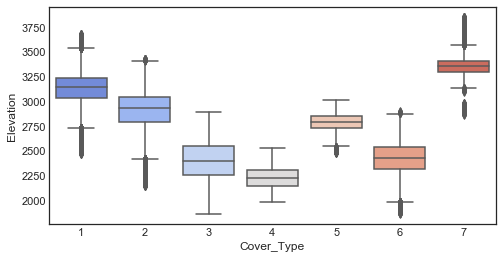

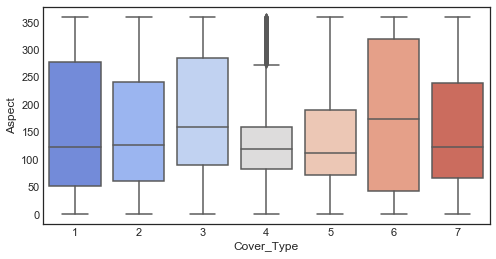

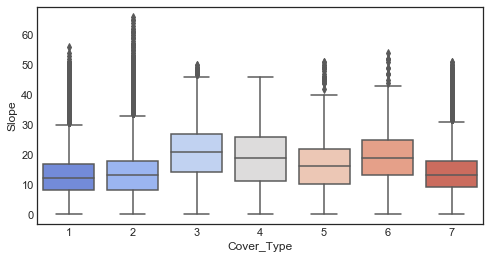

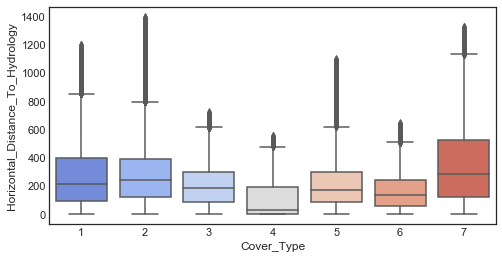

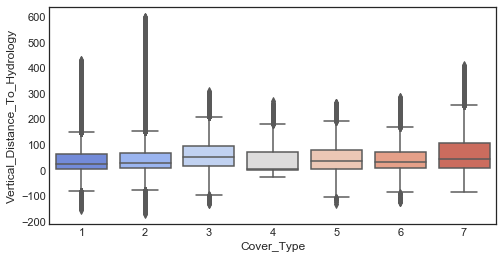

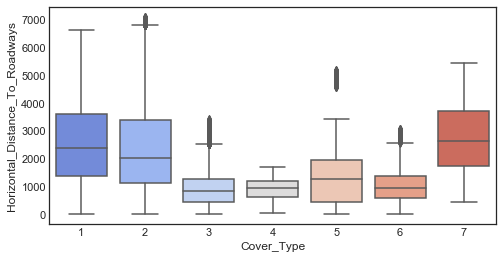

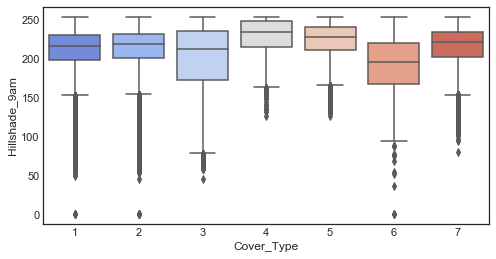

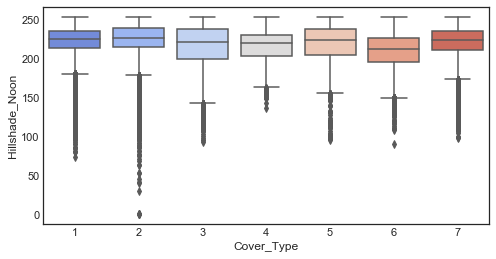

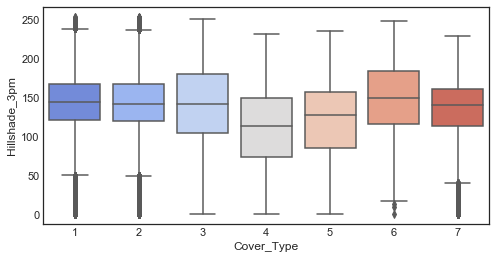

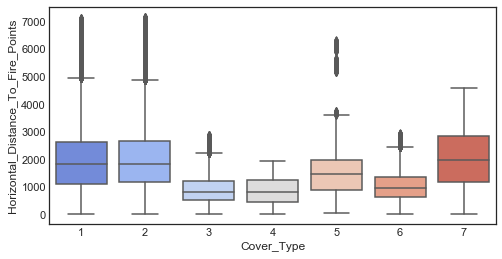

In [33]:
df['Cover_Type']=df['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=df['Cover_Type'], y=col, data=df, palette="coolwarm")

## EDA - Heatmap correlation 

No correlations between the values means that Naive Bayes will need to be applied. 

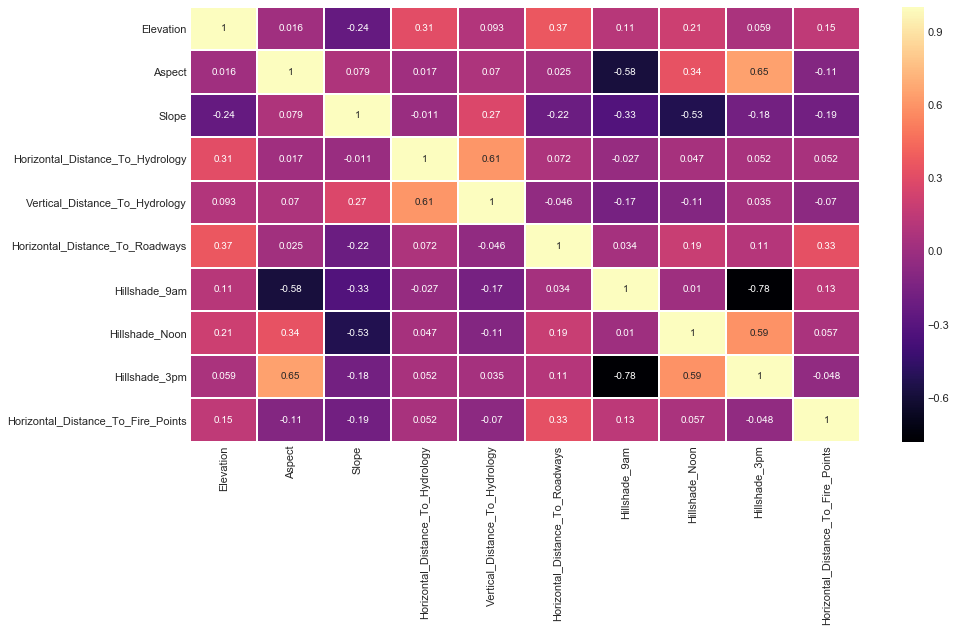

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

# Models 

## Multiple Logistic Regression

In [35]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [36]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df.ix[:, 'Elevation':'Soil_Type40']
y = df['Cover_Type']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
predictions = logmodel.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.71      0.68      0.69     69978
           2       0.73      0.80      0.76     93523
           3       0.61      0.86      0.71     11696
           4       0.58      0.23      0.33       875
           5       0.00      0.00      0.00      3225
           6       0.42      0.06      0.10      5762
           7       0.71      0.47      0.57      6675

   micro avg       0.71      0.71      0.71    191734
   macro avg       0.54      0.44      0.45    191734
weighted avg       0.69      0.71      0.69    191734



## Interpretation

*The Multiple Logistic Regression model under performed, likely since the binary values are not log transformed. 
The binary value counts indicates will need to log transform data to use in a Logistic Regression. One way of working with the binary presence/absence data is to use a Species Distribution Modeling: https://scikit-learn.org/stable/auto_examples/applications/plot_species_distribution_modeling.html)*

The weighted average F1-score 0.69 for the testing data. This scores is not terrible, but it does indicate a larger problem of imbalanced data within the Cover Type classes. 

Spruce/Fir(1): Contains the second highest value counts in the data set at 211840. It's not surprising it would have a higher F1-score at 0.69. Much of the forests surveyed in the four wilderness areas contained a high frequency of spruce/fir. Since is a very dominant forest type in northern colorado. 

Lodgepole pine(2): Contains the highest value counts within the data set at 283301. The model did predict correct predict Lodgepole pine with the highest F1-score. 

Ponderosa pine(3): Surprising result is that Ponderosa pine has a recall of 0.86 (highest) and a F1-score of 0.71. So Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

Cottonwood/Willow(4): The model sampled 875 out of 2747 which is 31% accuracy. For the class with the least amount of data performed better at predicting then class 5 and 6. 

Aspen(5): In this model the cover type 5 (Aspen) is not even identified showing up as 0.00. This is likely do to Aspen's niche environments along streams, lakes, and damp environemnts. The Logistic regression model did not accurately predict Aspen, suggesting that the discontinous cover types (such as aspen) located within narrower strips of forest is difficult to predict. The logistic regression model is likely asigning elevation as a determining factor for predicting cover types. 

Douglas-fir(6): The model poorly assigned douglas-fir 0.10 F1-score even though it contained 17367 data points. The habitat that douglas-fir is in is less distinctive compared to cover types (1, 2, and 3). Meaning that Douglas-fir does not occur is large patches of forest continiously by itself. It is often mixed with aspen, spruce/fir, lodgepole and ponderosa pines. 

Krummholz(7): The fourth highest class occurence Krummholz also produced the fourth best F1-score at 0.57. This is a distinct environment different from other cover types. 

In summary, predicted cover types that were most distinct from others. Cover types (1, 2, 3, and 7) all have a distinct statistical characteristics that define there cover types. Cover types (4, 5, and 6) are less distinct statistical characteristics that define these cover types. The cover types 4-6 likely have more mixing of other cover types, more restrictive boundaries for area surveyed, and are environmentally restricted to wetted or damper environments. 

## Dealing with imbalanced data - Multiple Logistic Regression 

In [45]:
#!pip install imblearn 

In [25]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

from collections import Counter
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced



In [26]:
# fraction of rows
# here you get 75% of the rows
df.sample(frac=0.75, random_state=99)
train = df.sample(frac=0.75, random_state=99)

In [27]:
# you can't simply split 0.75 and 0.25 without overlapping
# this code tries to find that train = 75% and test = 25%
test = df.loc[~df.index.isin(train.index), :]

In [28]:
X = df.ix[:, 'Elevation':'Soil_Type40']
y = df['Cover_Type']

In [29]:


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

# Create a pipeline
pipeline = make_pipeline(NearMiss('not majority', version=2),
                         LinearSVC(random_state=42))
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

Training target statistics: Counter({2: 212525, 1: 158834, 3: 26845, 7: 15445, 6: 12994, 5: 7020, 4: 2096})
Testing target statistics: Counter({2: 70776, 1: 53006, 3: 8909, 7: 5065, 6: 4373, 5: 2473, 4: 651})
                   pre       rec       spe        f1       geo       iba       sup

          1       0.25      0.00      1.00      0.01      0.05      0.00     53006
          2       0.51      0.99      0.10      0.68      0.32      0.11     70776
          3       0.81      0.06      1.00      0.11      0.24      0.05      8909
          4       0.22      0.84      0.99      0.35      0.91      0.82       651
          5       0.00      0.00      1.00      0.00      0.00      0.00      2473
          6       0.29      0.23      0.98      0.26      0.48      0.21      4373
          7       0.43      0.08      1.00      0.14      0.29      0.07      5065

avg / total       0.41      0.50      0.56      0.35      0.22      0.07    145253



### Running the undersampling is very memory consuming 

#### I tried running the undersampling multiple times however each time my laptop would crash and I would have to restate it again. It does show that the undersampling did work by greatly reducing the number of values in cover types 1 and 2. However, printing out the classification report without crashing maybe related to reducing the number of X variables used or changing the NearMiss parameters. 

The undersampling poorly performed. It did an okay job at predicting cover type 2 (Lodgepole pine). However, the other cover types F1-scores are much lower after undersampling. It appears that the undersampling sample disportionity across the data set. In order to have an effect undersampling all F1-scores should be very similar or the data samples in each cover type class should be similar. The model above shows that undersampling does did effectively work with Logistic regression model. 


# Naive Bayes - Comparing cross validation scores 

#### We except a Bernoulli distribution of the data with presence/absence. Using Naive Bayes 

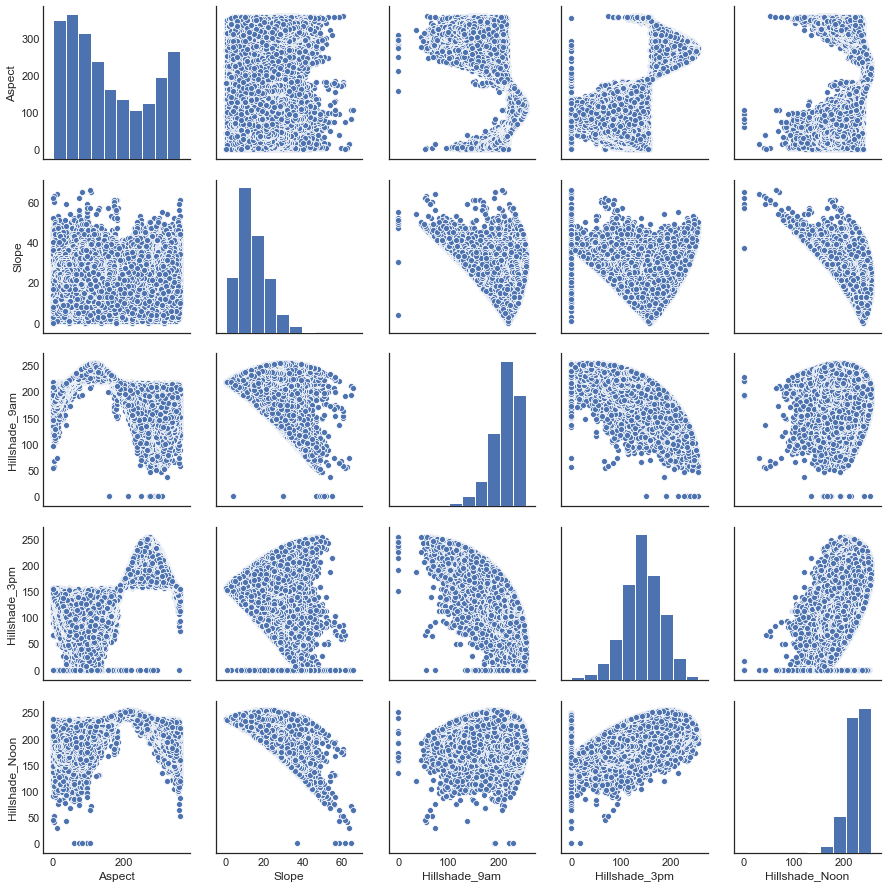

In [54]:
sns.pairplot(df[['Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_3pm', 'Hillshade_Noon']])

*The sns.pairplot above is an indication Classification models such as Naive Bayes and Decision Trees need to be used. The non-linear relationship among continous features: aspect, slope, hillshade_9am, hillshade_3pm, and hillshade_noon. Reinforces the fact this is not a linear model.*

In [3]:
data = df.ix[:, 'Elevation':'Soil_Type40']
target = df['Cover_Type']

In [4]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [5]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.6329440720119102
Testing on Sample: 0.6316960751240939


In [6]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix


In [7]:
f1_score(target, y_pred, average='macro')  


0.4858291475128337

In [8]:
f1_score(target, y_pred, average='micro')  


0.6316960751240939

In [9]:
f1_score(target, y_pred, average='weighted')

0.62033315951235

In [10]:
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.48      0.55    211840
           2       0.65      0.76      0.70    283301
           3       0.60      0.87      0.71     35754
           4       0.55      0.43      0.48      2747
           5       0.22      0.06      0.10      9493
           6       0.24      0.23      0.23     17367
           7       0.63      0.61      0.62     20510

   micro avg       0.63      0.63      0.63    581012
   macro avg       0.51      0.49      0.49    581012
weighted avg       0.63      0.63      0.62    581012



In [11]:
f1_score(target, y_pred, average=None)

array([0.55119701, 0.70274974, 0.71317334, 0.47952498, 0.09873107,
       0.23302741, 0.62240048])

## Interpretation 

*Naive Bayes moderately predicted Cover Type (2 and 3), however the rest of the F1-scores are very low. Indicates that Naive Bayes did not do a good job with false positives and false negatives. By applying undersampling technique could help balance the dataset, would help produce a better model. However, it would also throw out a bunch of data as well. 

The weighted value of 0.62 is close to the Logistic model of 0.69. Reducing the features in the model may improve the results. It works on conditional probability. Conditional probability is the probability that something will happen, given that something else has already occurred. We use the F1-score to compare the tests accuracy with other models. 

Spruce/Fir(1): F1-score of 0.55 Compared the logistic model the Naive Bayes under performed at predicting this cover type. 

Lodgepole pine(2): F1-score 0.70

Ponderosa pine(3): F1-score 0.71

Both 2 and 3 cover types had F1-scores almost identical to that in the logistic model. Lodgepole and ponderosa pine forests appear to be most distinct cover types that are easiest to predict. 

Cover types 4-7 using the Naive Bayes model performed slightly better. This is most evidence with cover type 5 (Aspen) with a 0.10 (which is low) it did not even register with the logistic model. 

Naives Bayes model does a better job using conditional probabilities to with classes (cover types) with less data. 


# Xgboost (Boosting) 



In [63]:
!pip install xgboost

smart-open 1.7.1 requires bz2file, which is not installed.
rfpimp 1.3.2 requires sklearn, which is not installed.
jupyter-console 5.2.0 has requirement prompt_toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.7 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [6]:


# Definine outcome and predictors.
# Set our outcome to 0 and 1.
X = df.ix[:, 'Elevation':'Soil_Type40']
y = df['Cover_Type']

In [7]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [8]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [9]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [10]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [11]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))

Accuracy: 74.55%
              precision    recall  f1-score   support

           1       0.74      0.73      0.73     70052
           2       0.76      0.83      0.79     93189
           3       0.68      0.85      0.76     11873
           4       0.83      0.58      0.68       972
           5       0.79      0.10      0.18      3124
           6       0.51      0.11      0.18      5687
           7       0.84      0.52      0.64      6837

   micro avg       0.75      0.75      0.75    191734
   macro avg       0.73      0.53      0.57    191734
weighted avg       0.74      0.75      0.73    191734



### The Xgboost model gave an overall 0.73 F1-score. It did a much better job predicting cover types compared to Logistic and Naive Bayes models. 

"XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

When using gradient boosting for regression, the weak learners are regression trees, and each regression tree maps an input data point to one of its leafs that contains a continuous score. XGBoost minimizes a regularized (L1 and L2) objective function that combines a convex loss function (based on the difference between the predicted and target outputs) and a penalty term for model complexity (in other words, the regression tree functions). The training proceeds iteratively, adding new trees that predict the residuals or errors of prior trees that are then combined with previous trees to make the final prediction. It's called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models." (https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-HowItWorks.html)


Cover Types:
Most consistent predictions: 
1 (Spruce/fir) - has a F1-score of 0.73 which is higher then both Naive Bayes (0.55) and Logistic at (0.69). Using a gradient boost trees able to predict a higher outcome of the cover type. 

2 (Lodgepole pine) - has an F1-score of 0.79 which only slightly higher then logistic (0.76) and Naive Bayes at (0.70). 

3 (Ponderosa pine) - has an F1-score of 0.76 which both Logistic and Naive Bayes (0.71). The consistency of predicting the ponderosa pine forest at 0.71 is interesting that all three models are predicting similar or same results. That may mean the the data for Ponderosa pine has very few outliers and is consistent throughout the dataset. 

7 (Krummholz) - has an F1-score of 0.64 which is slightly higher then Naive Bayes at (0.62) and Logistic model at (0.57). Even though the F1-scores are lower the other cover types listed above it shows consistency in predicting the cover type. 

Inconsistent predictions:
Cover types 4 (Aspen), 5 (Cottonwood/willow), and 6 (Douglas-fir) all show high variability cross all models for predicting cover type. The inconsistencies goes back to pacthy cover types that cover less area overall that are not consistently defined boundaries. These factors lead to the low test accuracy of the F1-scores. 

# Random Forest 

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
%%time
rfc = RandomForestClassifier(n_estimators=600)

Wall time: 0 ns


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [15]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
predictions = rfc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     70052
           2       0.95      0.97      0.96     93189
           3       0.94      0.96      0.95     11873
           4       0.93      0.83      0.88       972
           5       0.95      0.76      0.84      3124
           6       0.93      0.89      0.91      5687
           7       0.97      0.95      0.96      6837

   micro avg       0.95      0.95      0.95    191734
   macro avg       0.95      0.90      0.92    191734
weighted avg       0.95      0.95      0.95    191734



In [19]:
print(confusion_matrix(y_test,predictions))

[[65853  4016     4     0    15     9   155]
 [ 2040 90716   190     0   100   116    27]
 [    1   178 11429    39     7   219     0]
 [    0     0   126   811     0    35     0]
 [   40   673    34     0  2362    15     0]
 [    5   199   392    23     7  5061     0]
 [  310    38     0     0     1     0  6488]]


In [20]:
print(rfc.feature_importances_)


[2.43979763e-01 4.84842728e-02 3.30929924e-02 6.05024030e-02
 5.76562050e-02 1.16188185e-01 4.15962742e-02 4.37967306e-02
 4.17511952e-02 1.09298872e-01 1.12728032e-02 5.55706470e-03
 1.16411840e-02 3.28603294e-02 1.09556317e-03 9.63458773e-03
 2.13177305e-03 1.17543834e-02 5.20604158e-04 2.07303805e-03
 1.00841902e-05 4.30836435e-05 1.20439365e-04 1.12239154e-02
 2.69259866e-03 9.45229563e-03 3.75208507e-03 3.46254927e-04
 5.83796060e-06 8.47149968e-04 1.68158709e-03 2.48775076e-04
 9.82851673e-04 1.90300770e-03 7.38039342e-04 1.50412251e-02
 1.02755328e-02 4.06227178e-03 1.84710486e-04 4.02417600e-04
 6.87905887e-04 1.75587552e-04 5.33148706e-03 3.16871111e-03
 3.76367218e-03 5.70716955e-03 4.48483665e-03 6.08186466e-04
 1.44825142e-03 7.59430243e-05 5.67615023e-04 9.73021051e-03
 9.82402974e-03 5.52400618e-03]


Feature ranking:
1. feature 0 (0.200254)
2. feature 5 (0.111836)
3. feature 9 (0.105239)
4. feature 3 (0.064380)
5. feature 4 (0.059013)
6. feature 1 (0.052018)
7. feature 7 (0.045359)
8. feature 6 (0.043041)
9. feature 8 (0.042506)
10. feature 13 (0.036953)
11. feature 2 (0.036912)
12. feature 35 (0.018627)
13. feature 25 (0.015259)
14. feature 52 (0.013681)
15. feature 51 (0.013579)
16. feature 17 (0.013492)
17. feature 23 (0.012443)
18. feature 12 (0.012393)
19. feature 36 (0.012063)
20. feature 10 (0.011240)
21. feature 15 (0.009663)
22. feature 53 (0.008031)
23. feature 11 (0.006156)
24. feature 26 (0.005243)
25. feature 42 (0.005102)
26. feature 37 (0.004286)
27. feature 45 (0.003969)
28. feature 24 (0.003889)
29. feature 46 (0.003821)
30. feature 43 (0.003623)
31. feature 44 (0.003205)
32. feature 19 (0.002635)
33. feature 16 (0.002620)
34. feature 48 (0.002308)
35. feature 33 (0.002104)
36. feature 30 (0.001999)
37. feature 14 (0.001383)
38. feature 34 (0.001182)
39. feature 32

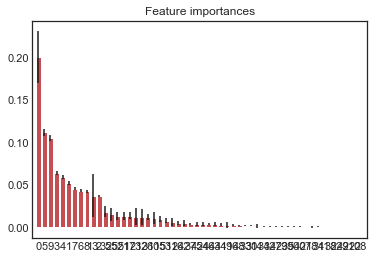

In [21]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Interpretation

*The Random Forest model did the best job at assigning and predicting the cover types. In RF the highest F1-scores at 0.96 and the lowest is 0.85. Meaning that the model did a good job at assigning false positives and false negatives.*

### The Random Forest model outperformed all the other models considerably. How did it outperform? 

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result. (https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd)

The bagging method of does a very good job at predicting multiclasses. It was able to use the data to produce a higher test accurary F1-score for all cover types. With a overall weighted F1-score of 0.95 it is considerably higher then the other models. On average was 0.20 - 0.29 points higher the other models weighted average F1-scores. 

The most insconsistent cover types performed better then the best prediction in any of the other models. Random Forest does a very good job at using the entire data set to bag data into classification leading to predictions. 

